In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
df=pd.read_csv('person.csv')
df

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [5]:
df.shape

(8, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Person                8 non-null      object 
 1   height(in feet)       8 non-null      float64
 2   weight(in lbs)        8 non-null      int64  
 3   foot size(in inches)  8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [7]:
df.isnull().sum()

Person                  0
height(in feet)         0
weight(in lbs)          0
foot size(in inches)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,height(in feet),weight(in lbs),foot size(in inches)
count,8.000000,8.000000,8.000000
mean,5.636250,154.375000,9.375000
std,0.333721,28.962722,2.263846
min,5.000000,100.000000,6.000000
25%,5.480000,145.000000,7.750000
50%,5.665000,157.500000,9.500000
75%,5.920000,172.500000,11.250000
max,6.000000,190.000000,12.000000


UNIQUE VALUES

In [11]:
for i in df.columns:
  print(i,len(df[i].unique()))

Person 2
height(in feet) 7
weight(in lbs) 7
foot size(in inches) 7


In [12]:
df['Person'].value_counts()

Person
male      4
female    4
Name: count, dtype: int64

In [13]:
x=df.iloc[:,1:4]
x.head()

,height(in feet),weight(in lbs),foot size(in inches)
0,6.00,180,12
1,5.92,190,11
2,5.58,170,12
3,5.92,165,10
4,5.00,100,6


In [14]:
y=df['Person']
y.head()

0      male
1      male
2      male
3      male
4    female
Name: Person, dtype: object

In [66]:
# Since our dataset containing character variables we have to encode it using LabelEncoder:

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# X[:,0] = le.fit_transform(X[:,0])

#Bivariate analysis

In [16]:
x.corr()

,height(in feet),weight(in lbs),foot size(in inches)
height(in feet),1.000000,0.909442,0.803875
weight(in lbs),0.909442,1.000000,0.919178
foot size(in inches),0.803875,0.919178,1.000000


<Axes: >

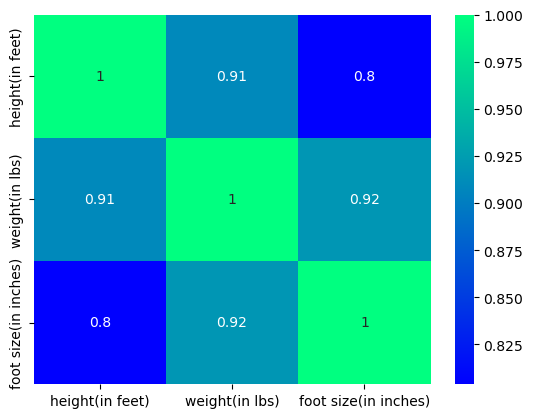

In [17]:
sns.heatmap(x.corr(),annot=True,cmap='winter')

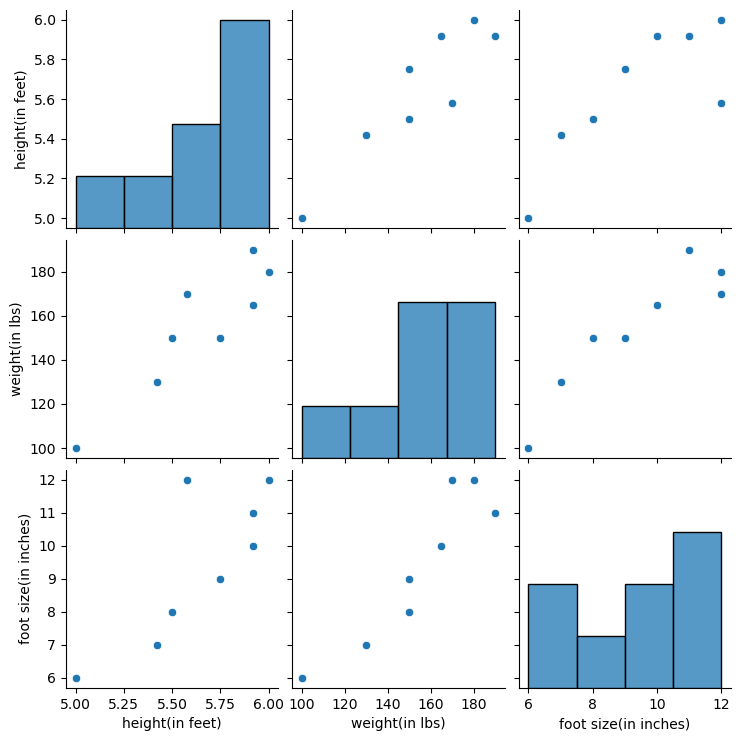

In [18]:
sns.pairplot(x)

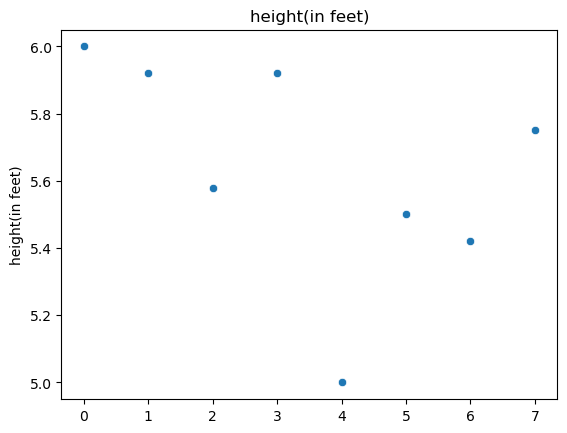

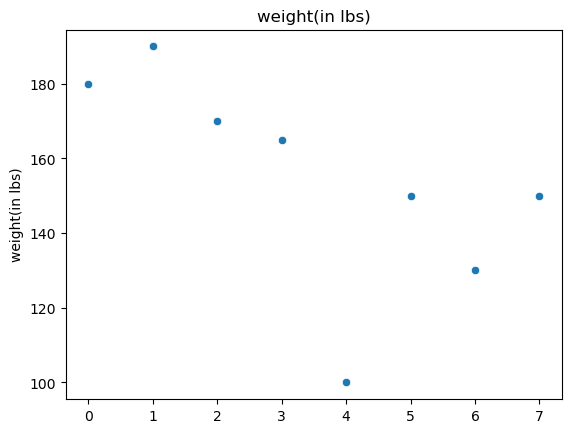

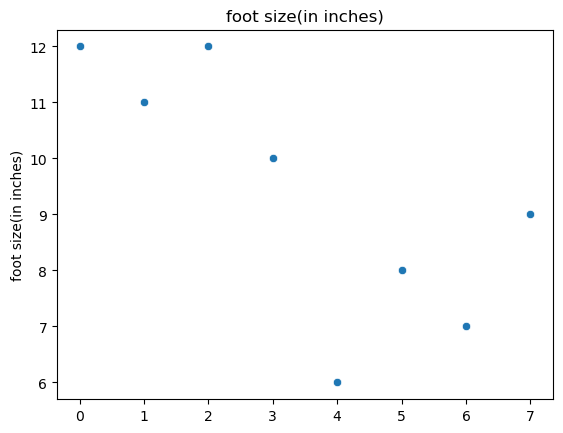

In [19]:
for i in x.columns:
  sns.scatterplot(x[i])
  plt.title(i)
  plt.show()

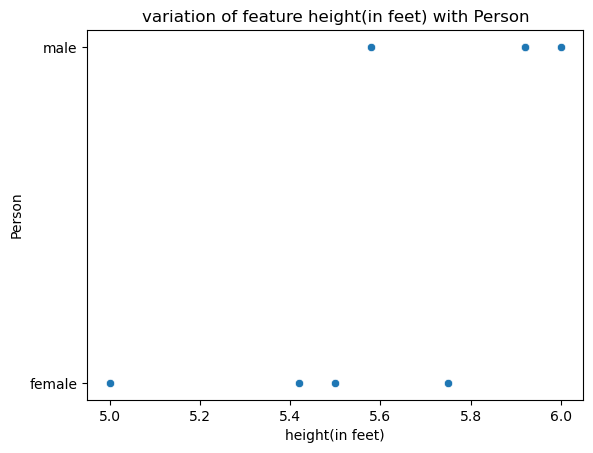

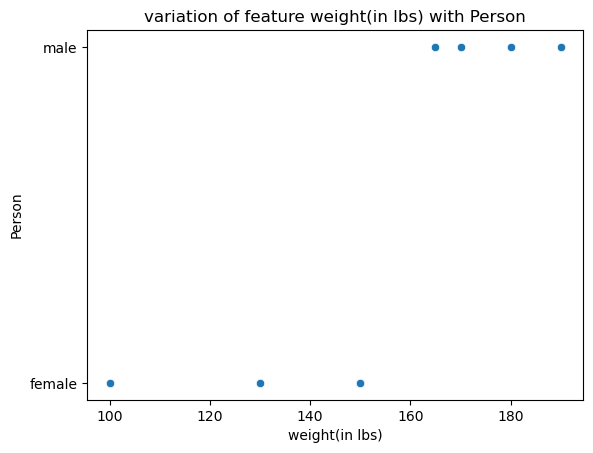

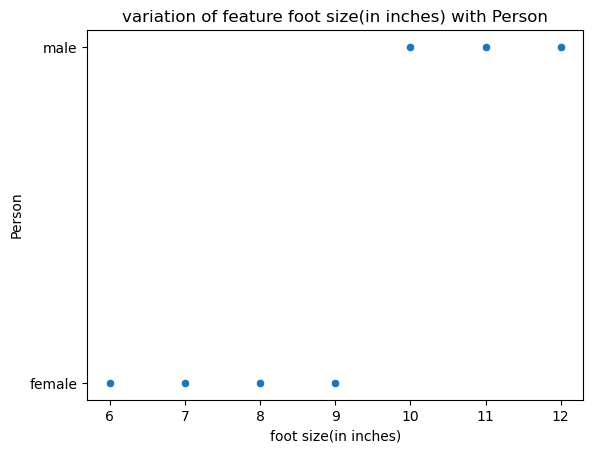

In [20]:
#Variation of features with Target variable
for i in x.columns:
  sns.scatterplot(x=x[i],y=y)
  plt.title(f'variation of feature {i} with Person')
  plt.show()

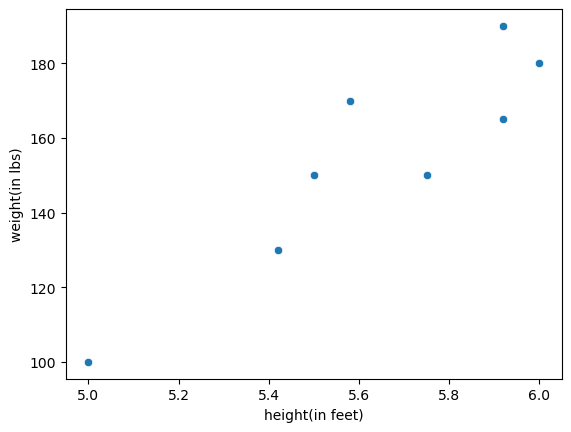

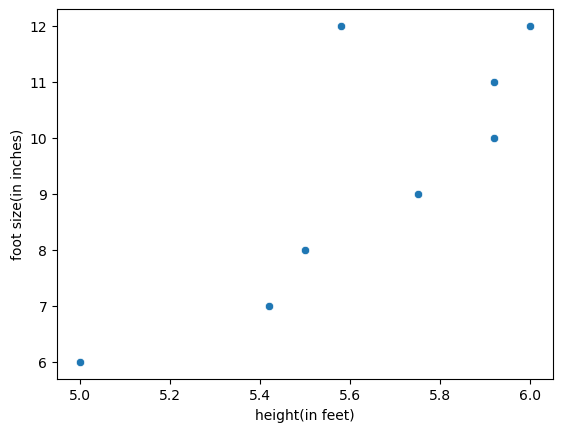

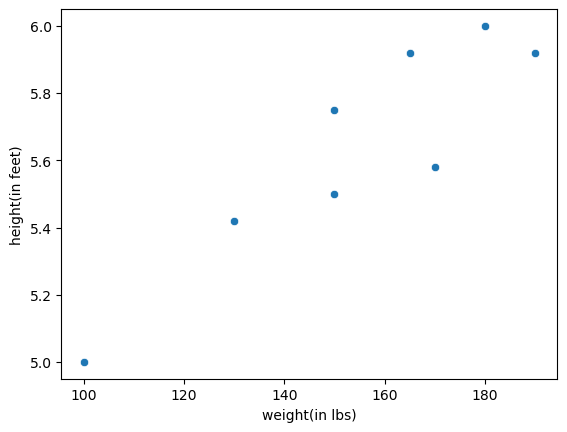

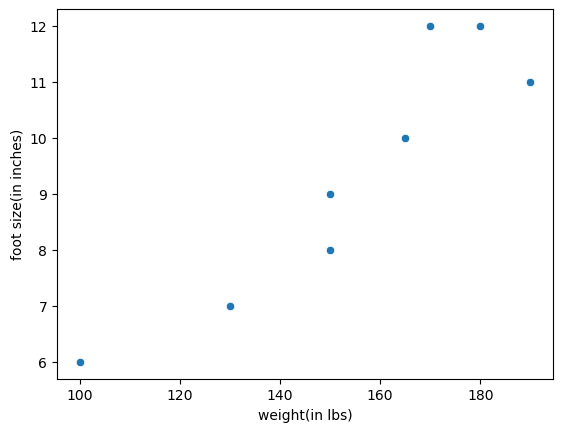

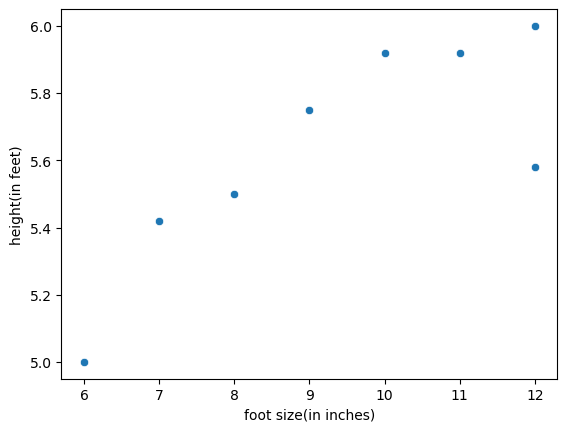

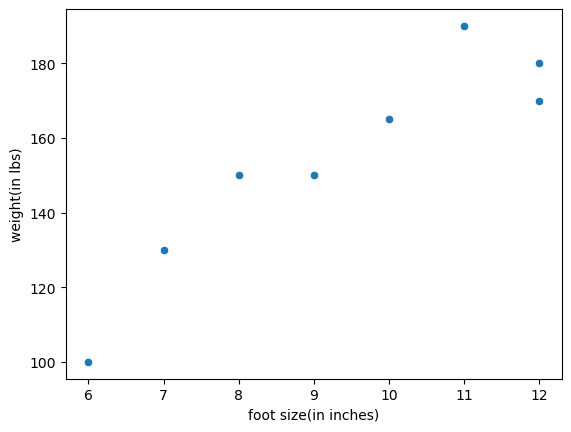

In [21]:
#Correlation between Features
for i in x.columns:
  for j in x.columns:
    if i !=j:
      sns.scatterplot(x=x[i],y=x[j])
      plt.show()

In [22]:
#1. Getting numerical features from dataset
#2. Creating Numerical dataframe
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']
print('We have {} numerical features:{}'.format(len(numerical_features),numerical_features))

We have 3 numerical features:['height(in feet)', 'weight(in lbs)', 'foot size(in inches)']


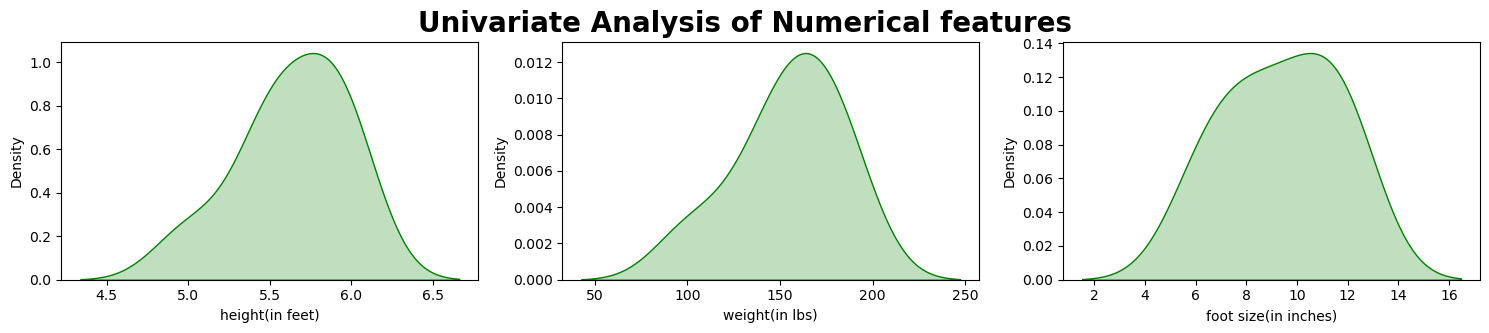

In [23]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical features',fontsize=20,fontweight='bold')

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numerical_features[i]],fill=True,color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

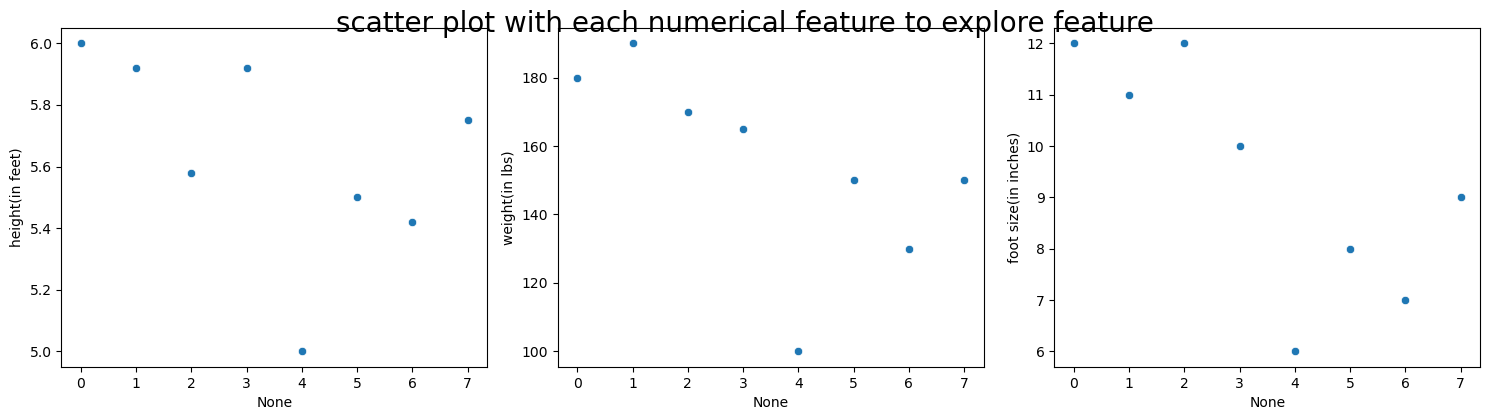

In [24]:
#scatter plot to see the trends in each numerical column

plt.figure(figsize=(15,20))
plt.suptitle('scatter plot with each numerical feature to explore feature',fontsize=20)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=numerical_features[i],x=df.index,data=df)
    plt.tight_layout()

In [25]:
#1. Getting numerical features from dataset
#2. Creating Numerical dataframe
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']
print('We have {} categorical features:{}'.format(len(categorical_features),categorical_features))

We have 1 categorical features:['Person']


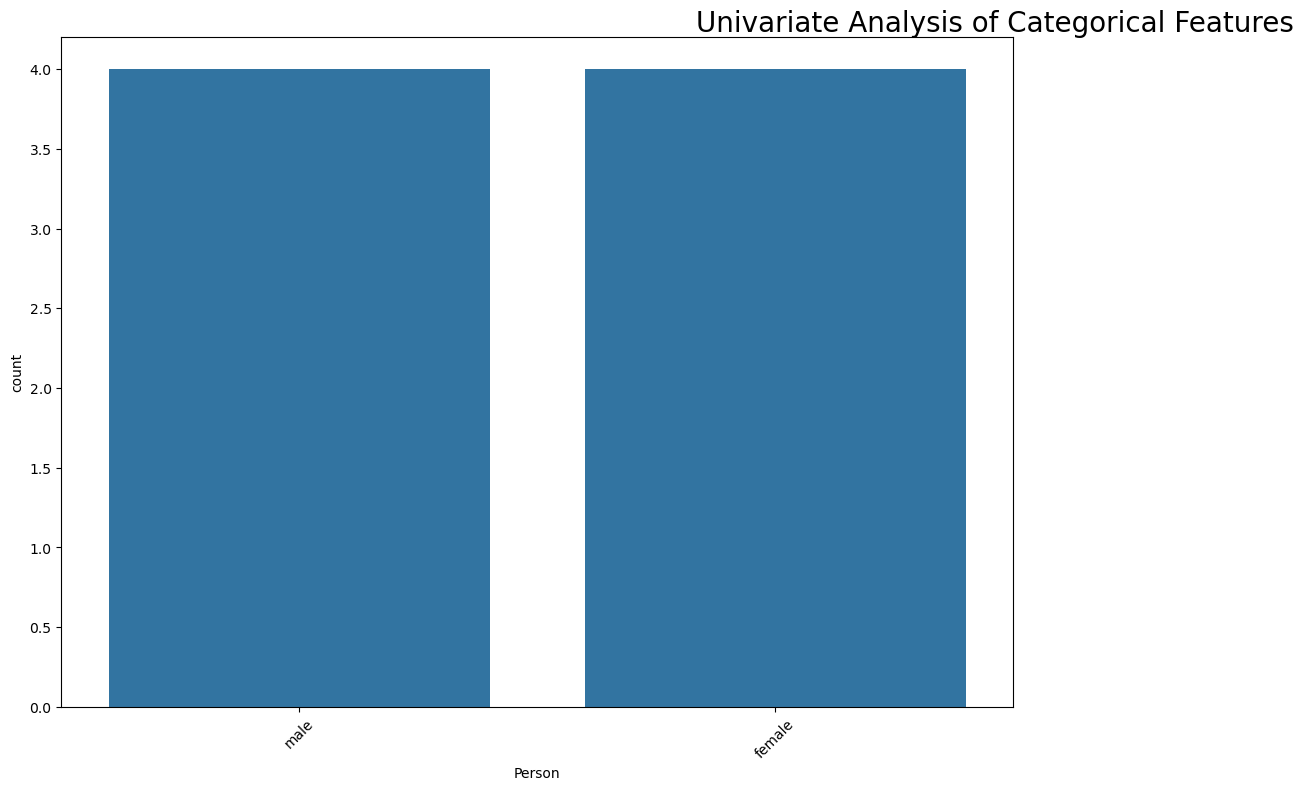

In [26]:
#categorical columns Analysis
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20)
cat1=['Person']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
# Train Bayes-Theorem model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array(['female', 'female', 'male'], dtype='<U6')

In [31]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [32]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

      female       0.50      1.00      0.67         1
        male       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



<Axes: >

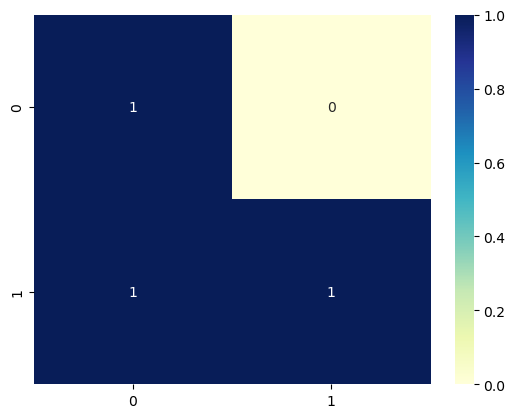

In [33]:

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu')

In [34]:
# Predict purchase with Age(30) and Salary(87000)
P_new=np.array([[5.5,145,7]])
print(classifier.predict(sc.transform(P_new)))

['female']


C:\Users\tssin\Amaconda_3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
